In [133]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import os

%matplotlib notebook

In [3]:
data_dir = "./"
db_file = 'fundos.db'
engine = create_engine(
    "sqlite:///"+os.path.abspath(os.path.join(data_dir, db_file)))
data_inicio = '1500-02-26'
data_fim = '2017-12-31'

In [129]:
# acoes
sqlquery = """
select * from cotacoes
WHERE CODNEG in ('{ativos}')
OR CODISI in ('{ativos}')
and DATA >= '{data_inicio}'
and DATA <= '{data_fim}'
""".format(ativos="','".join(['MGLU3']), data_inicio=data_inicio, data_fim=data_fim)
acoes_qry = pd.read_sql_query(sqlquery, engine, parse_dates=['DATA'])

In [130]:
grupamentos = pd.read_parquet("../Dados/grupamentos.parquet")
grupamentos.loc[grupamentos.iloc[:,0] == 'DESDOBRAMENTO', '% / Fator de Grupamento'] = grupamentos.loc[grupamentos.iloc[:,0] == 'DESDOBRAMENTO', '% / Fator de Grupamento'].div(100).add(1)
grupamentos = grupamentos[grupamentos.Proventos.isin(['GRUPAMENTO','DESDOBRAMENTO'])]

C:\ProgramData\Anaconda3\lib\site-packages\pyarrow\pandas_compat.py:698: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\ProgramData\Anaconda3\lib\site-packages\pyarrow\pandas_compat.py:725: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\ProgramData\Anaconda3\lib\site-packages\pyarrow\pandas_compat.py:742: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [131]:
for data, fator, ativo in grupamentos[grupamentos['Código ISIN'].isin(acoes_qry.CODISI.unique())].iloc[:,[3,4,5]].to_records(index=False):
    q = (acoes_qry.CODISI == ativo) & (acoes_qry.DATA <= data)
    c = ['PREABE', 'PREMAX', 'PREMIN', 'PREMED', 'PREULT','PREOFC', 'PREOFV']
    acoes_qry.loc[q,c] = acoes_qry.loc[q,c].div(fator)

<IPython.core.display.Javascript object>


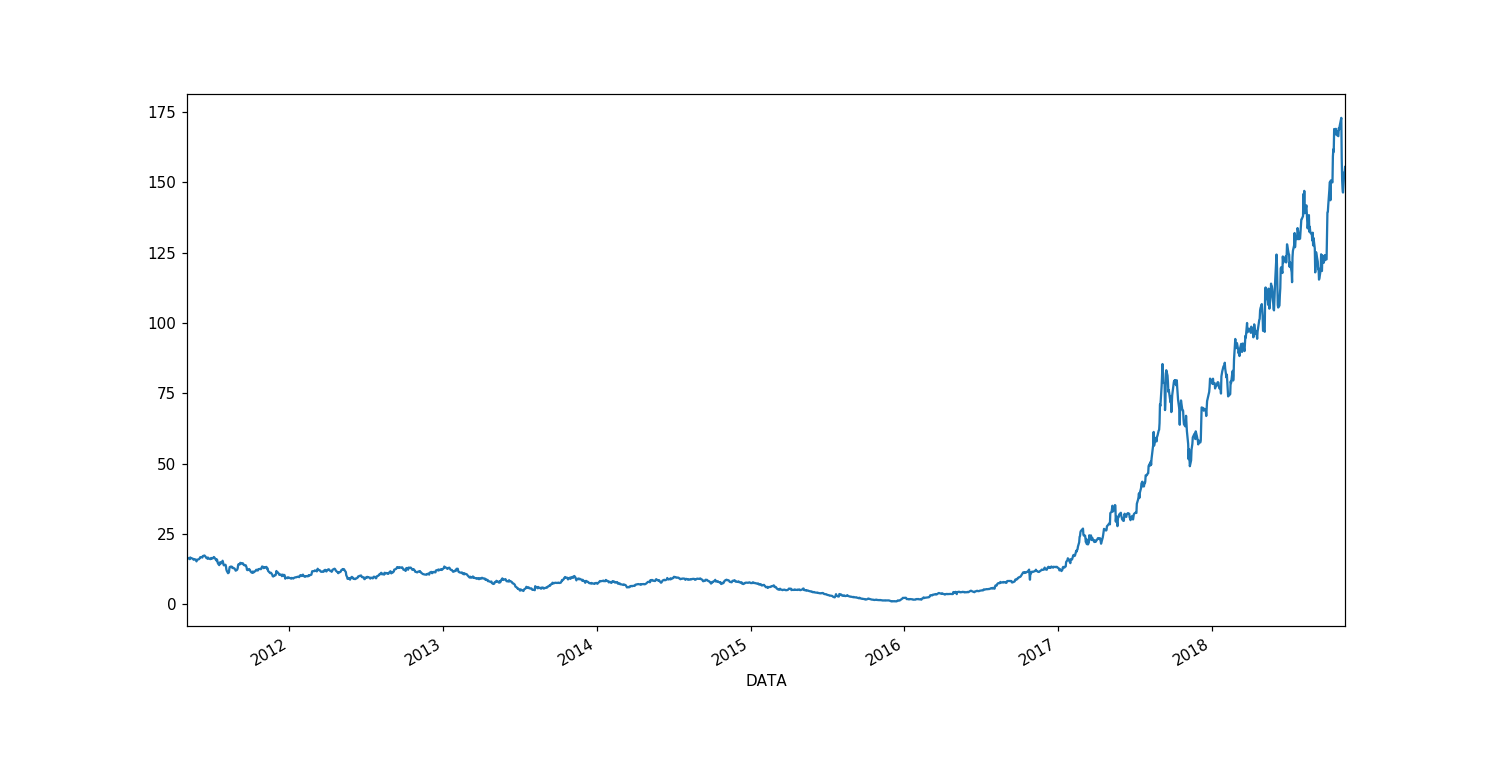

In [132]:
acoes_qry.set_index('DATA')['PREULT'].div(100).plot()

In [114]:
acoes_qry.columns

Index(['Id', 'TIPO', 'DATA', 'CODBDI', 'CODNEG', 'TPMERC', 'NOMERES', 'ESPECI',
       'PRAZOT', 'MODREF', 'PREABE', 'PREMAX', 'PREMIN', 'PREMED', 'PREULT',
       'PREOFC', 'PREOFV', 'TOTNEG', 'QUATOT', 'VOLTOT', 'PREEXE', 'INDOPC',
       'DATVEN', 'FATCOT', 'PTOEXE', 'CODISI', 'DISMES'],
      dtype='object')

In [72]:
retornos_acoes = acoes_qry.query("TPMERC == 10").pivot_table(index='DATA', columns='CODNEG', values='PREULT').div(100)

In [73]:
grupamentos[grupamentos['Ativo Emitido'] == 'BRMGLUACNOR2']

,Proventos,Código ISIN,Deliberado em,Negócios com até,% / Fator de Grupamento,Ativo Emitido,Observações,TICKER
0,DESDOBRAMENTO,BRMGLUACNOR2,2017-09-04,2017-09-04,8.000,BRMGLUACNOR2,NaN,MGLU
1,GRUPAMENTO,BRMGLUACNOR2,2015-09-30,2015-09-30,0.125,BRMGLUACNOR2,NaN,MGLU


In [74]:
retornos_acoes.loc[:'2015-09-30'] = retornos_acoes.loc[:'2015-09-30'].div(0.125)

In [85]:
retornos_acoes.loc[:'2017-09-04']

CODNEG,MGLU3
DATA,
2011-05-02,131.60
2011-05-03,130.40
2011-05-04,131.84
2011-05-05,131.04
2011-05-06,130.08
2011-05-09,128.00
2011-05-10,132.72
2011-05-11,131.20
2011-05-12,131.36


In [77]:
grupamentos.loc[grupamentos.iloc[:,0] == 'DESDOBRAMENTO']

,Proventos,Código ISIN,Deliberado em,Negócios com até,% / Fator de Grupamento,Ativo Emitido,Observações,TICKER
2,DESDOBRAMENTO,BRALPAACNOR0,2010-02-24,2010-02-24,20.0,BRALPAACNOR0,NaN,ALPA
3,DESDOBRAMENTO,BRALPAACNPR7,2010-02-24,2010-02-24,20.0,BRALPAACNPR7,NaN,ALPA
2,DESDOBRAMENTO,BRAZEVACNOR0,2011-04-29,2011-04-29,1000.0,BRAZEVACNOR0,NaN,AZEV
3,DESDOBRAMENTO,BRAZEVACNPR7,2011-04-29,2011-04-29,1000.0,BRAZEVACNPR7,NaN,AZEV
2,DESDOBRAMENTO,BRBEESACNOR9,2012-01-17,2012-08-17,1000.0,BRBEESACNOR9,NaN,BEES
3,DESDOBRAMENTO,BRBEESACNPR6,2012-01-17,2012-08-17,1000.0,BRBEESACNPR6,NaN,BEES
0,DESDOBRAMENTO,BRBALMACNOR5,2014-04-30,2014-04-30,10.0,BRBALMACNOR5,NaN,BALM
1,DESDOBRAMENTO,BRBALMACNPR2,2014-04-30,2014-04-30,10.0,BRBALMACNPR2,NaN,BALM
2,DESDOBRAMENTO,BRBBDCACNOR1,2009-03-10,2009-06-08,50.0,BRBBDCACNOR1,NaN,BBDC
3,DESDOBRAMENTO,BRBBDCACNPR8,2009-03-10,2009-06-08,50.0,BRBBDCACNPR8,NaN,BBDC


In [67]:
retornos_acoes.loc['2017-09':]

CODNEG,MGLU3
DATA,
2017-09-01,70.51750
2017-09-04,77.72375
2017-09-05,82.00000
2017-09-06,85.41000
2017-09-08,78.92000
2017-09-11,78.30000
2017-09-12,69.02000
2017-09-13,72.30000
2017-09-14,82.00000
